## poisson intervals distribution

mean:9989
max:98757
[np.float64(4818.0), np.float64(11781.0), np.float64(33808.0), np.float64(9958.0), np.float64(5119.0), np.float64(2431.0), np.float64(8248.0), np.float64(452.0), np.float64(2213.0), np.float64(2099.0), np.float64(16758.0), np.float64(3643.0), np.float64(3315.0), np.float64(2272.0), np.float64(2588.0), np.float64(1183.0), np.float64(10265.0), np.float64(37584.0), np.float64(9205.0), np.float64(14099.0), np.float64(3845.0), np.float64(16988.0), np.float64(18080.0), np.float64(4111.0), np.float64(2821.0), np.float64(1141.0), np.float64(13332.0), np.float64(7683.0), np.float64(19816.0), np.float64(4998.0), np.float64(9588.0), np.float64(3092.0), np.float64(2177.0), np.float64(3390.0), np.float64(10608.0), np.float64(24943.0), np.float64(25395.0), np.float64(14334.0), np.float64(48962.0), np.float64(5291.0), np.float64(17532.0), np.float64(14993.0), np.float64(2561.0), np.float64(1605.0), np.float64(9046.0), np.float64(8059.0), np.float64(3613.0), np.float64(35718.0), np

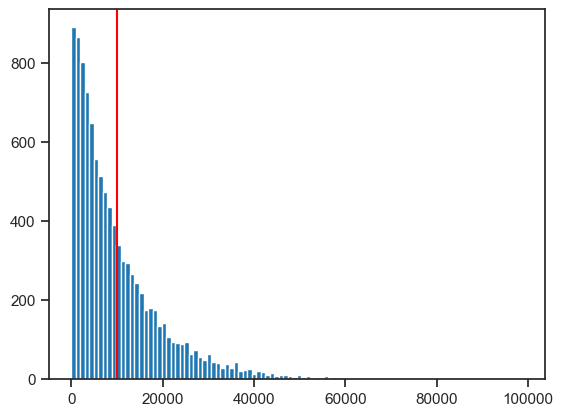

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

stepsLenght = []
for i in range(10000):
    roll= np.ceil(np.random.exponential(10000))
    stepsLenght.append(roll)
    # print(roll)

stepsPos = [0] * len(stepsLenght)
        
for i in range(len(stepsLenght)):
    if(i == 0):
        stepsPos[0] = 100
    else:
        stepsPos[i] = stepsPos[i-1] + stepsLenght[i]

plt.hist(stepsLenght,100)
plt.axvline(np.mean(stepsLenght), color='red')
print("mean:" + str(int(np.mean(stepsLenght))) +"\nmax:" + str(int(np.max(stepsLenght))))
print(stepsLenght)
print(stepsPos)

#sns.distplot(np.random.exponential(size=1000000), hist=True)


# test #1

## normal

### U vs Pos

443000
629000
655000
661000
662000
726000
727000
731000
732000
739000
740000
776000
777000
778000
816000
966000
968000
986000


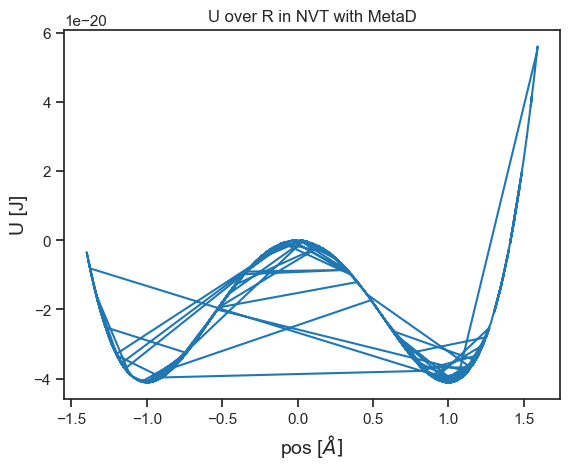

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')

df = pd.read_csv("simForMetaD_low.log", sep='\s+')

xyz = open("SimForMetaD_low.xyz", 'r')
posX, posY, posZ, time = ([] for i in range(4))
count = 0
for i in xyz:
    line = i.split()
    if(count % 3 == 1):
        time.append(line[1])
    elif(count % 3 == 2):
        posX.append(float(line[1]))
        posY.append(float(line[2]))
        posZ.append(float(line[3]))
    count += 1
xyz.close()

for i in range(1, len(posX)):
    if(posX[i -1] * posX[i] < 0):
        print(time[i])

plt.title("U over R in NVT with MetaD")
plt.xlabel(r"pos [$\AA ]$")
plt.ylabel("U [J]")
plt.plot(posX, df['U'])
plt.show()

### pos vs time

443000.0
629000.0
655000.0
661000.0
662000.0
726000.0
727000.0
731000.0
732000.0
739000.0
740000.0
776000.0
777000.0
778000.0
816000.0
966000.0
968000.0
986000.0


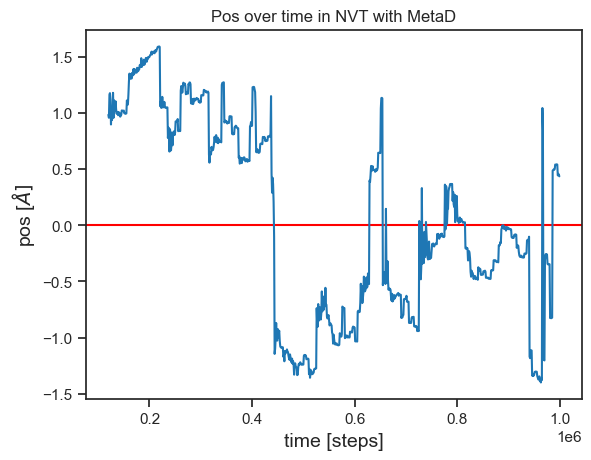

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')

xyz = open("SimForMetaD_low.xyz", 'r')
posX, posY, posZ, time = ([] for i in range(4))
count = 0
for i in xyz:
    line = i.split()
    if(count % 3 == 1):
        time.append(float(line[1]))
    elif(count % 3 == 2):
        posX.append(float(line[1]))
        # posY.append(float(line[2]))
        # posZ.append(float(line[3]))
    count += 1
xyz.close()

for i in range(1, len(posX)):
    if(posX[i -1] * posX[i] < 0):
        print(time[i])

plt.title("Pos over time in NVT with MetaD")
plt.xlabel("time [steps]")
plt.ylabel(r"pos [$\AA ]$")
plt.axhline(0, color='red')
plt.plot(time, posX)

## with Poisson distribution

### U vs pos

232000
323000
329000
333000
352000
417000
420000
484000
489000
492000
494000
498000
499000
500000
501000
527000
651000
670000
734000
747000
871000
970000
972000


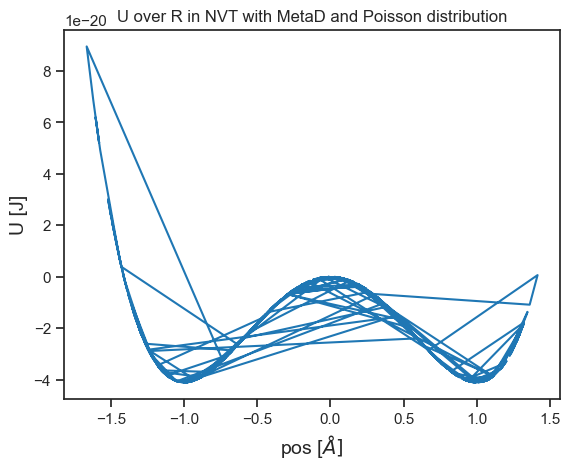

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')

df = pd.read_csv("simForMetaD_lowWithDist.log", sep='\s+')

xyz = open("SimForMetaD_lowWithDist.xyz", 'r')
posX, posY, posZ, time = ([] for i in range(4))
count = 0
for i in xyz:
    line = i.split()
    if(count % 3 == 1):
        time.append(line[1])
    elif(count % 3 == 2):
        posX.append(float(line[1]))
        posY.append(float(line[2]))
        posZ.append(float(line[3]))
    count += 1
xyz.close()

for i in range(1, len(posX)):
    if(posX[i -1] * posX[i] < 0):
        print(time[i])

plt.title("U over R in NVT with MetaD and Poisson distribution")
plt.xlabel(r"pos [$\AA ]$")
plt.ylabel("U [J]")
plt.plot(posX, df['U'])

### pos vs time

232000.0
323000.0
329000.0
333000.0
352000.0
417000.0
420000.0
484000.0
489000.0
492000.0
494000.0
498000.0
499000.0
500000.0
501000.0
527000.0
651000.0
670000.0
734000.0
747000.0
871000.0
970000.0
972000.0


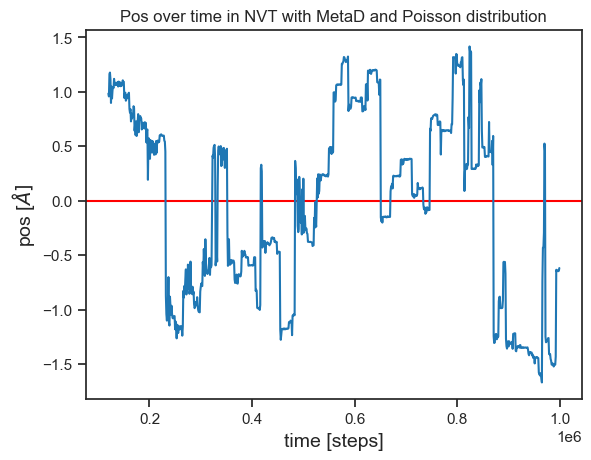

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')

xyz = open("SimForMetaD_lowWithDist.xyz", 'r')
posX, posY, posZ, time = ([] for i in range(4))
count = 0
for i in xyz:
    line = i.split()
    if(count % 3 == 1):
        time.append(float(line[1]))
    elif(count % 3 == 2):
        posX.append(float(line[1]))
        # posY.append(float(line[2]))
        # posZ.append(float(line[3]))
    count += 1
xyz.close()

for i in range(1, len(posX)):
    if(posX[i -1] * posX[i] < 0):
        print(time[i])

plt.title("Pos over time in NVT with MetaD and Poisson distribution")
plt.xlabel("time [steps]")
plt.ylabel(r"pos [$\AA ]$")
plt.axhline(0, color='red')
plt.plot(time, posX)

# test 2

## normal

### U vs Pos

589000
918000
919000
923000
997000


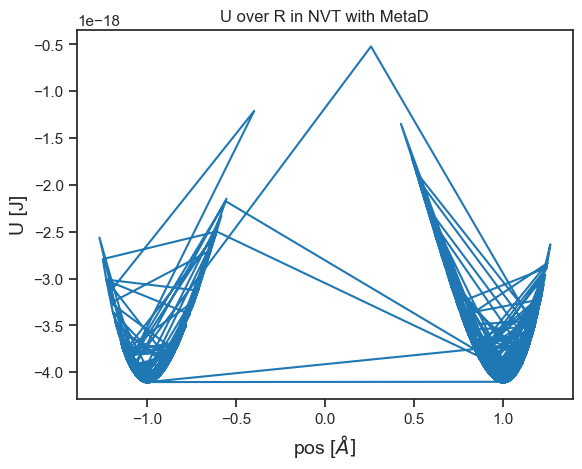

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')

df = pd.read_csv("simForMetaD_lowDeep.log", sep='\s+')

xyz = open("SimForMetaD_lowDeep.xyz", 'r')
posX, posY, posZ, time = ([] for i in range(4))
count = 0
for i in xyz:
    line = i.split()
    if(count % 3 == 1):
        time.append(line[1])
    elif(count % 3 == 2):
        posX.append(float(line[1]))
        posY.append(float(line[2]))
        posZ.append(float(line[3]))
    count += 1
xyz.close()

for i in range(1, len(posX)):
    if(posX[i -1] * posX[i] < 0):
        print(time[i])

plt.title("U over R in NVT with MetaD")
plt.xlabel(r"pos [$\AA ]$")
plt.ylabel("U [J]")
plt.plot(posX, df['U'])

### pos vs time

589000.0
918000.0
919000.0
923000.0
997000.0


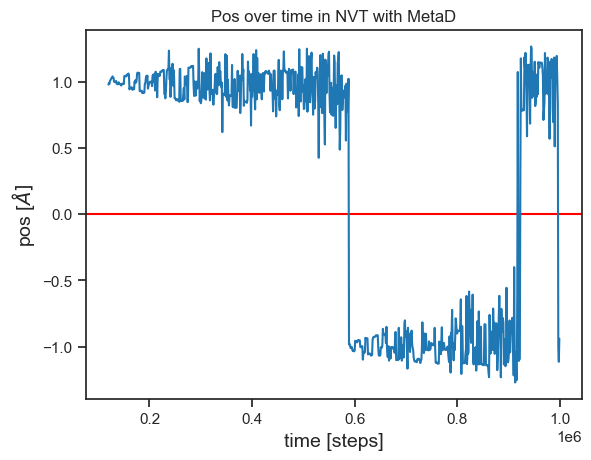

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')

xyz = open("SimForMetaD_lowDeep.xyz", 'r')
posX, posY, posZ, time = ([] for i in range(4))
count = 0
for i in xyz:
    line = i.split()
    if(count % 3 == 1):
        time.append(float(line[1]))
    elif(count % 3 == 2):
        posX.append(float(line[1]))
        # posY.append(float(line[2]))
        # posZ.append(float(line[3]))
    count += 1
xyz.close()

for i in range(1, len(posX)):
    if(posX[i -1] * posX[i] < 0):
        print(time[i])

plt.title("Pos over time in NVT with MetaD")
plt.xlabel("time [steps]")
plt.ylabel(r"pos [$\AA ]$")
plt.axhline(0, color='red')
plt.plot(time, posX)

## with Poisson distribution

### U vs pos

379000
594000
677000
684000
691000
692000
708000
710000
726000
737000
799000
807000
809000
810000
826000
829000
837000
843000
855000
856000
864000
869000
873000
875000
876000
877000
883000
884000
894000
902000
920000
922000
924000
928000
932000
933000
938000
939000
943000
944000
946000
948000
951000
953000
963000
968000
970000
971000
972000
976000
977000
979000
982000
986000
988000
989000
994000
996000


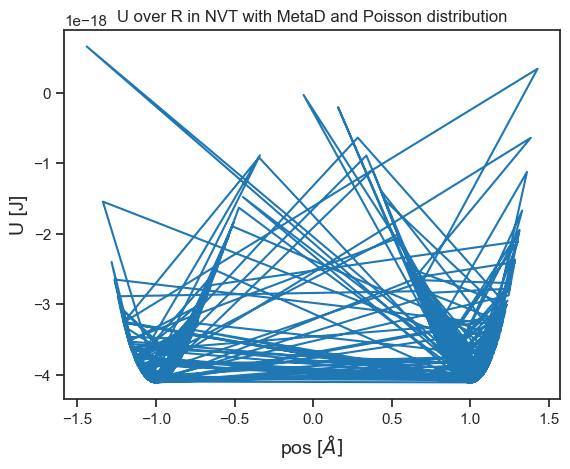

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')

df = pd.read_csv("simForMetaD_lowWithDistDeep.log", sep='\s+')

xyz = open("SimForMetaD_lowWithDistDeep.xyz", 'r')
posX, posY, posZ, time = ([] for i in range(4))
count = 0
for i in xyz:
    line = i.split()
    if(count % 3 == 1):
        time.append(line[1])
    elif(count % 3 == 2):
        posX.append(float(line[1]))
        posY.append(float(line[2]))
        posZ.append(float(line[3]))
    count += 1
xyz.close()

for i in range(1, len(posX)):
    if(posX[i -1] * posX[i] < 0):
        print(time[i])

plt.title("U over R in NVT with MetaD and Poisson distribution")
plt.xlabel(r"pos [$\AA ]$")
plt.ylabel("U [J]")
plt.plot(posX, df['U'])

### pos vs time

379000.0
594000.0
677000.0
684000.0
691000.0
692000.0
708000.0
710000.0
726000.0
737000.0
799000.0
807000.0
809000.0
810000.0
826000.0
829000.0
837000.0
843000.0
855000.0
856000.0
864000.0
869000.0
873000.0
875000.0
876000.0
877000.0
883000.0
884000.0
894000.0
902000.0
920000.0
922000.0
924000.0
928000.0
932000.0
933000.0
938000.0
939000.0
943000.0
944000.0
946000.0
948000.0
951000.0
953000.0
963000.0
968000.0
970000.0
971000.0
972000.0
976000.0
977000.0
979000.0
982000.0
986000.0
988000.0
989000.0
994000.0
996000.0


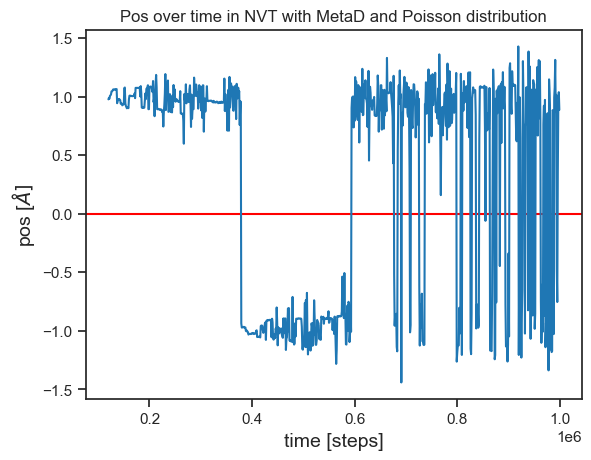

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')

xyz = open("SimForMetaD_lowWithDistDeep.xyz", 'r')
posX, posY, posZ, time = ([] for i in range(4))
count = 0
for i in xyz:
    line = i.split()
    if(count % 3 == 1):
        time.append(float(line[1]))
    elif(count % 3 == 2):
        posX.append(float(line[1]))
        # posY.append(float(line[2]))
        # posZ.append(float(line[3]))
    count += 1
xyz.close()

for i in range(1, len(posX)):
    if(posX[i -1] * posX[i] < 0):
        print(time[i])

plt.title("Pos over time in NVT with MetaD and Poisson distribution")
plt.xlabel("time [steps]")
plt.ylabel(r"pos [$\AA ]$")
plt.axhline(0, color='red')
plt.plot(time, posX)